In [112]:
# Data Collection
import pandas as pd
df=pd.read_csv('../Datasets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
# Size of dataset (rows,columns)
df.shape

(1338, 7)

In [115]:
# Detailed information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
df.describe()
# This function provide only non-categorical data 
# as the given parameters can't be computed for categorical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [117]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values are found.

# Visualizing data

C:\Users\shiva\AppData\Local\Temp\ipykernel_14636\1033505752.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


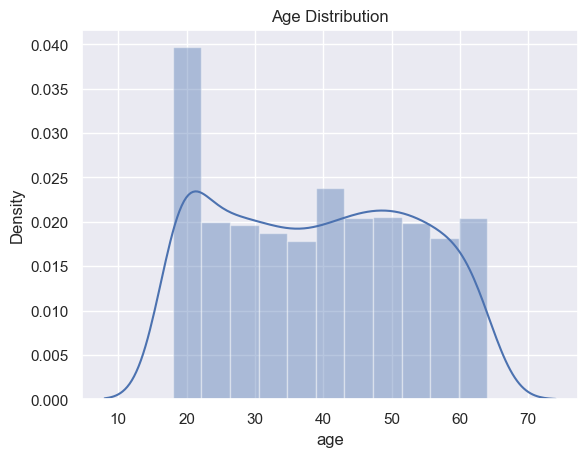

In [118]:
# Distribution of age value
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set()
# sns.histplot(df['age'])
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

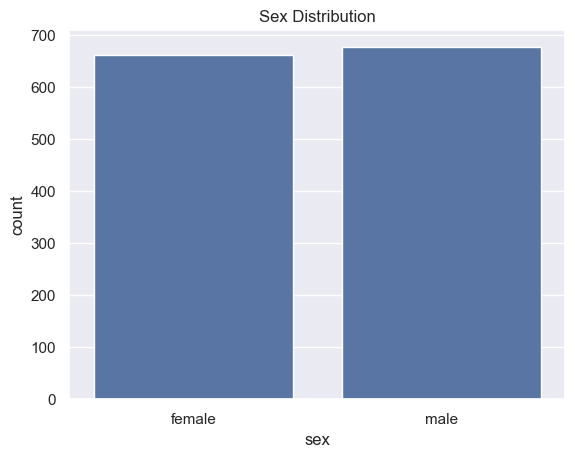

sex
male      676
female    662
Name: count, dtype: int64

In [119]:
# Gender column
sns.countplot(x='sex',data=df)
plt.title("Sex Distribution")
plt.show()

df['sex'].value_counts()

C:\Users\shiva\AppData\Local\Temp\ipykernel_14636\2401451624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


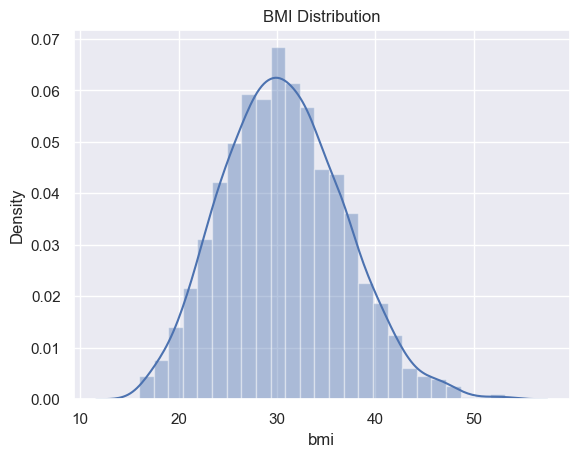

In [120]:
# BMI Distribution
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal BMI range : 18.5-24.9

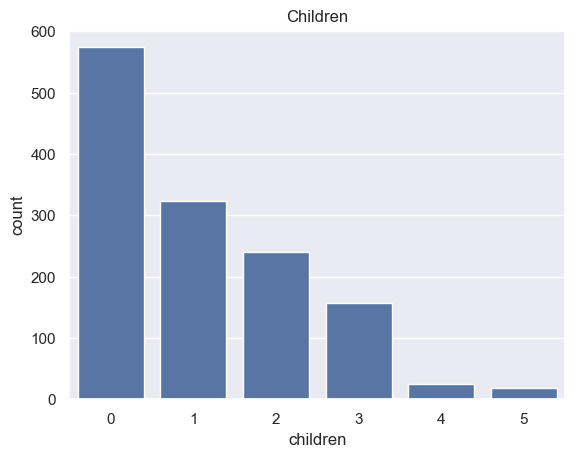

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [121]:
# Children column
sns.countplot(x='children',data=df)
plt.title("Children")
plt.show()

# df['children'].count().sum()
df['children'].value_counts()

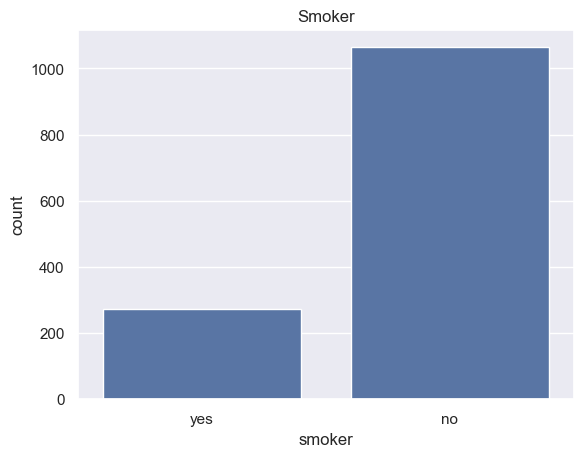

smoker
no     1064
yes     274
Name: count, dtype: int64

In [122]:
# Smoker
sns.countplot(x='smoker',data=df)
plt.title("Smoker")
plt.show()

df['smoker'].value_counts()

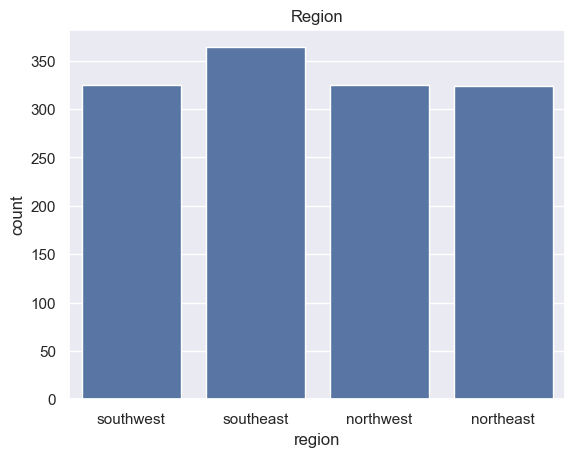

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [123]:
sns.countplot(x='region',data=df)
plt.title("Region")
plt.show()

df['region'].value_counts()

C:\Users\shiva\AppData\Local\Temp\ipykernel_14636\828566020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


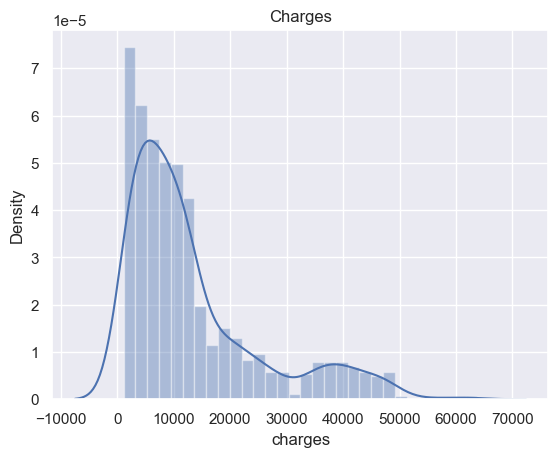

In [124]:
sns.distplot(df['charges'])
plt.title("Charges")
plt.show()

In [125]:
# Encoding the categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df=df.apply(lambda x: lbl.fit_transform(x) if x.dtype=="object" else x)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [126]:
# Splitting features and target
x=df.drop(columns='charges',axis=1)
# axis=1 as we are removing a column, it will be 0 if we are removing row
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [127]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [128]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape,xtrain.shape, xtest.shape)
print(y.shape,ytrain.shape , ytest.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


In [129]:
# Building model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

score: 75.19923667088932 %


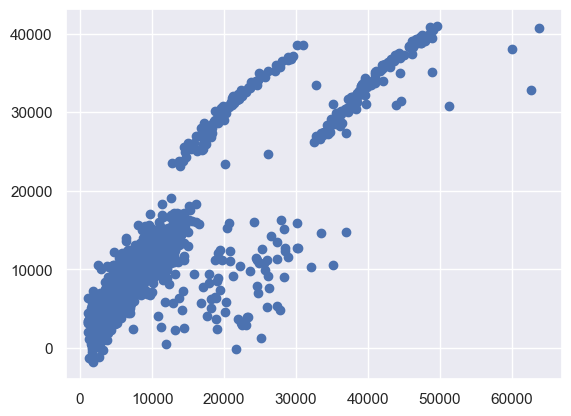

In [130]:
# Prediction on training data
trainpred=model.predict(xtrain)

from sklearn import metrics
print("score:",metrics.r2_score(ytrain,trainpred)*100,'%')
plt.scatter(ytrain,trainpred)
plt.show()

score 74.45422986536502 %


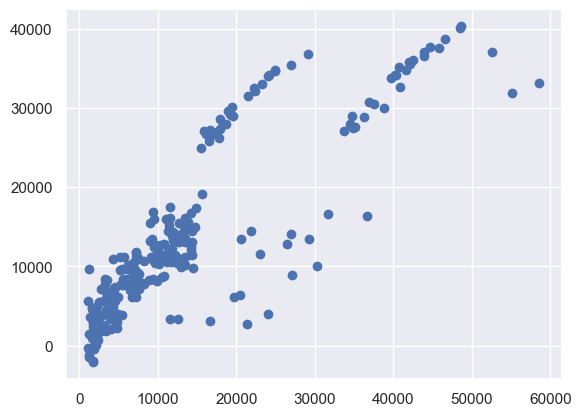

In [131]:
# Prediction on testing data
testpred=model.predict(xtest)

print("score",metrics.r2_score(ytest,testpred)*100,'%')
plt.scatter(ytest,testpred)
plt.show()

Since the score of training and testing are almost equal, the data is properly fitted.

# Prediction

In [132]:
input=(19,0,27.9,0,1,3)

import numpy as np
input=np.array(input)
input=input.reshape(1,-1)
output=model.predict(input)
print("predicted cost:",output)

predicted cost: [25191.82745682]


C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
